# Analyzing Twitter Data with Python

Outline:
* [Credentials and Authentication](#Credentials-and-Authentication)
* [Basics](#Basics)
  + Collecting Data
    - Basics
      - Status
      - Trends
    - Streaming API
  + Loading and Accessing Tweets
    - Single Tweet
      - User Data
      - Retweet Data
    - Multiple Tweets
* [Processing Text](#Processing-Text)
  + Flattening Tweets
  + Creating a DataFrame
  + Counting Words
  + Time Series
  + Sentiment Analysis


The `tweepy` module will be used to collect Twitter data with the Streaming API.

In [2]:
# !pip install tweepy

In [1]:
# import tweepy
from tweepy import OAuthHandler, API

import json

## Credentials and Authentication

First of all, we need to create a Twitter account, validate it, and then create a Twitter developer account. The developer account can be created within the [Twitter developer](https://developer.twitter.com/en/apps) web page.

Second, we create an app to generate a _Customer Key_, a _Consumer Secret_, an _Access Token_, and an _Access Token Secret_.

The steps to generate keys are as follows:
- Create a Twitter acoount, validate it with a phone number,
- Create a Twitter developer account,
- Create an app,
- Generate keys and tokens.

It is worth noting that the app's API keys should be kept secure. It is important not to commit API keys and access tokens to publicly accessible version control systems such as Github or BitBucket.

The Twitter credentials (keys and tokens) can be kept locally as a `.json` file in the following format.

```
{"consumer_key":"API key",
 "consumer_secret":"API secret key",
 "access_token_key":"Access token",
 "access_token_secret":"Access token secret"
}
```

In [3]:
# Load Twitter app information
with open('twitter_cred.json','r') as file:
    twitter_cred = json.load(file)

In [4]:
consumer_key = twitter_cred['consumer_key']
consumer_secret = twitter_cred['consumer_secret']
access_token = twitter_cred['access_token_key']
access_token_secret = twitter_cred['access_token_secret']

`tweepy` library requires a Twitter API key to authenticate with Twitter.

In [5]:
# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

We can print the username to see if our account is properly authenticated.

In [7]:
user = api.me()
# print(user.name)

## Collecting Data

### Basics

`tweepy.api` is a wrapper for the Twitter API. Methods include:
 - Timeline Methods,
 - Status Methods,
 - User Methods,
 - Direct Message Methods,
 - Friendship Methods,
 - Account Methods,
 - Favorite Methods,
 - Block Methods,
 - Saved Searches Methods, 
 - Spam Reporting Methods,
 - Help Methods,
 - List Methods,
 - Trends Methods,
 - Geo Methods.
[Source:tweepy](https://tweepy.readthedocs.io/en/v3.5.0/api.html#api-reference)

#### Status

A **status** is a _tweet_ with various attributes such as _created at_, _id_, and _text_. (See [twitter](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) for full list of attributes.)

For example, below status is [the most retweeted tweet](https://mashable.com/article/most-retweeted-tweet-billionaire/?europe=true) in English, as of 2018.

In [9]:
# Get the status of the most retweeted tweet
status = api.get_status('849813577770778624')

In [10]:
type(status)

tweepy.models.Status

In [11]:
# Print first 500 characters of the Status.
str(status)[:500]

"Status(_api=<tweepy.api.API object at 0x109051710>, _json={'created_at': 'Thu Apr 06 02:38:40 +0000 2017', 'id': 849813577770778624, 'id_str': '849813577770778624', 'text': 'HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 849813572351737856, 'id_str': '849813572351737856', 'indices': [38, 61], 'media_url': 'http://pbs.twimg.com/media/C8sk8QlUwAAR3qI.jpg', 'media_url_h"

In [12]:
status.text

'HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3'

In [13]:
status.user.name

'Carter Wilkerson'

In [14]:
status.created_at

datetime.datetime(2017, 4, 6, 2, 38, 40)

We can convert the status object to JSON format using `.dumps()` function. The parameter `indent` is to make it easier reading the result.

In [15]:
# Status to json object (encoding)
tweet_json = json.dumps(status._json, indent=2)
print(tweet_json)

{
  "created_at": "Thu Apr 06 02:38:40 +0000 2017",
  "id": 849813577770778624,
  "id_str": "849813577770778624",
  "text": "HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3",
  "truncated": false,
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 849813572351737856,
        "id_str": "849813572351737856",
        "indices": [
          38,
          61
        ],
        "media_url": "http://pbs.twimg.com/media/C8sk8QlUwAAR3qI.jpg",
        "media_url_https": "https://pbs.twimg.com/media/C8sk8QlUwAAR3qI.jpg",
        "url": "https://t.co/4SrfHmEMo3",
        "display_url": "pic.twitter.com/4SrfHmEMo3",
        "expanded_url": "https://twitter.com/carterjwm/status/849813577770778624/photo/1",
        "type": "photo",
        "sizes": {
          "small": {
            "w": 382,
            "h": 680,
            "resize": "fit"
          },
          "thumb": {
            "w": 150,
         

In [16]:
type(tweet_json), type(status)

(str, tweepy.models.Status)

#### Trends

_Where On Earth IDentifier (WOEID)_ is used to represent a _place_. `.trends_available()` method gives us a list of dictionaries within which WOEID's are available.

In [17]:
# Choose country
country = 'Turkey'

# Get the available WOEID of the selected country
next((item for item in api.trends_available() if item["name"] == country), None)

{'name': 'Turkey',
 'placeType': {'code': 12, 'name': 'Country'},
 'url': 'http://where.yahooapis.com/v1/place/23424969',
 'parentid': 1,
 'country': 'Turkey',
 'woeid': 23424969,
 'countryCode': 'TR'}

In [19]:
# Get the WOEID for the Worldwide trends
api.trends_available()[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [20]:
# Worldwide trends (WOEID=1)
trends_ww = api.trends_place(1)

# name of the first top trend worldwide
trends_ww[0]['trends'][0]['name']

'#GameOfThronesFinale'

#### Streaming API

Streaming API allows us to collect real-time Twitter data based on either a sample or **keyword** filtering. 
>Using the streaming api has three steps.
 - Create a class inheriting from StreamListener,
 - Using that class create a Stream object,
 - Connect to the Twitter API using the Stream. [Source: tweepy](https://tweepy.readthedocs.io/en/v3.5.0/streaming_how_to.html)

Below code calls a Stream Listener. [Main Source](https://github.com/SocialDataAnalytics-Winter2018/lab04/blob/master/slistener.py) 

In [8]:
%run SListener.py

Alternatively, we can load the file into the cell with the `%load` magic command. (`%load?` for more info)

In [22]:
# Print SListener.py
# %load SListener.py

In [59]:
from tweepy import Stream

# Instantiate the SListener object, specify a time limit to listen (in seconds) 
listen = SListener(api, time_limit=600)

# Instantiate the Stream object
stream = Stream(auth, listen)

There are various _streams_ available through Tweepy. We'll use `filter` to stream all tweets containing the _keywords_ in this notebook.

In [60]:
# Set up keywords to track
keywords = ['datascience', 'python']

# Begin collecting data
stream.filter(track = keywords)

> Streams not terminate unless the connection is closed, blocking the thread. Tweepy offers a convenient async parameter on filter so the stream will run on a new thread. For example

`myStream.filter(track=['python'], async=True)`

## Loading and Accessing Tweets

Tweets are collected from the Streaming API in **JSON** format. JSON is written with JavaScript object notation. We need to convert data into a Python data structure to work on it.

### Single Tweet

JSON can be converted to Python object using the `.loads()` method.

In [ ]:
# Convert from JSON to Python object (decode JSON)
tweet = json.loads(tweet_json)

type(tweet)

In [29]:
# Print tweet text
print(tweet['text'])

# Print tweet id
print(tweet['id'])

HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
849813577770778624


#### User Data

In [45]:
print(type(tweet['user']))
# Print information on the user
tweet['user']

<class 'dict'>


{'id': 2568270758,
 'id_str': '2568270758',
 'name': 'Carter Wilkerson',
 'screen_name': 'carterjwm',
 'location': 'Reno, NV - San Diego, CA',
 'description': 'I kinda like chicken nuggets',
 'url': 'https://t.co/hEJZpy9pwS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/hEJZpy9pwS',
     'expanded_url': 'http://nuggsforcarter.com',
     'display_url': 'nuggsforcarter.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 97943,
 'friends_count': 291,
 'listed_count': 3277,
 'created_at': 'Sun Jun 15 03:48:03 +0000 2014',
 'favourites_count': 27550,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 1738,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://

In [26]:
# Print user name
print(tweet['user']['screen_name'])

# Print user follower count
print(tweet['user']['followers_count'])

# Print user location
print(tweet['user']['location'])

# Print user description
print(tweet['user']['description'])

# Print the number of retweets
print(tweet['retweet_count'])

carterjwm
97943
Reno, NV - San Diego, CA
I kinda like chicken nuggets
3498450


In [34]:
# Check whether retweet or not
print(tweet['retweeted'])

False


#### Retweet Data

The structure of a retweet is similar to that of a tweet. Additionally, it holds information in `retweeted_status` field.

In [29]:
# Print the text of the tweet
#print(retweet['text'])

# Print the text of tweet which has been retweeted
#print(retweet['retweeted_status']['text'])

# Print the user handle of the tweet
#print(retweet['user']['screen_name'])

# Print the user handle of the tweet which has been retweeted
#print(retweet['retweeted_status']['user']['screen_name'])

In [10]:
with open('tweets.json', 'r') as tweet_json:
    # Read in the first status in the JSON file.
    twt = tweet_json.read().split("\n")[0]

# Decode JSON
retweet = json.loads(twt)

In [11]:
# Print the text of the tweet
print(retweet['text'])

RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 

The parser…


In [12]:
# Print the full text (140+ characters) of the tweet
retweet['retweeted_status']['extended_tweet']['full_text']

'The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️\U0001f973 \n\nThe parser generator was the first piece written for Python 29 years ago. It generates the parser rules (in the form of DFAs) from the grammar specification file.'

### Multiple Tweets in a JSON File

In [13]:
with open('tweets_1min.json', 'r') as tweet_json:
    # Read in the status in the JSON file.
    twt = tweet_json.read().split("\n")

# Print the raw info of the first tweet in the file
twt[0]

'{"created_at":"Sat Mar 02 19:19:29 +0000 2019","id":1101925010082394112,"id_str":"1101925010082394112","text":"RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! \\ud83d\\udc0d\\ud83d\\udda5\\ufe0f\\ud83e\\udd73 \\n\\nThe parser\\u2026","source":"\\u003ca href=\\"http:\\/\\/tapbots.com\\/tweetbot\\" rel=\\"nofollow\\"\\u003eTweetbot for i\\u039fS\\u003c\\/a\\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":18064071,"id_str":"18064071","name":"Erick \\ud83d\\ude43 Navarro","screen_name":"erickgnavar","location":"Lima, Peru","url":"https:\\/\\/erick.navarro.io","description":"I make software and I like it\\n\\u2764\\ufe0f #python","translator_type":"none","protected":false,"verified":false,"followers_count":328,"friends_count":1239,"listed_count":56,"favourites_count":2267,"statu

In [14]:
# Decode JSON
tweet_1 = json.loads(twt[0])

# Print out the tweet
tweet_1

{'created_at': 'Sat Mar 02 19:19:29 +0000 2019',
 'id': 1101925010082394112,
 'id_str': '1101925010082394112',
 'text': 'RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️\U0001f973 \n\nThe parser…',
 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18064071,
  'id_str': '18064071',
  'name': 'Erick 🙃 Navarro',
  'screen_name': 'erickgnavar',
  'location': 'Lima, Peru',
  'url': 'https://erick.navarro.io',
  'description': 'I make software and I like it\n❤️ #python',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 328,
  'friends_count': 1239,
  'listed_count': 56,
  'favourites_count': 2267,
  'statuses_count': 4161,
  'created_at

## Processing Text

### Flattening Tweets

It is usually a good idea to **flatten** the tweet JSON into a single level in order to analyze tweets in an easier manner. The  function below is used to flatten tweets and prepare the data before creating a Data Frame.

In [27]:
%run flatten.py
# %load flatten.py

In [ ]:
# Create flattened tweet list with the above function
tweet_list = flatten('tweets.json')

### Creating a DataFrame
We may want to load hundreds of tweets for analysis. Therefore, we need to import the file as a DataFrame.

In [23]:
import pandas as pd

In [28]:
# Create a pandas DataFrame
tweets_df = pd.DataFrame(tweet_list)

In [29]:
# Print out hte first 3 tweets
tweets_df.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,...,retweeted_status,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name
0,None,None,Sat Mar 02 19:19:29 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,NaN,0,False,...,{'created_at': 'Sat Mar 02 15:58:50 +0000 2019...,"The oldest piece of CPython, the parser genera...","The oldest piece of CPython, the parser genera...",pyblogsal,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...","RT @pyblogsal: The oldest piece of CPython, th...",1551554369837,False,"{'id': 18064071, 'id_str': '18064071', 'name':...",erickgnavar
1,None,None,Sat Mar 02 19:19:29 +0000 2019,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"{'full_text': 'Hier mal das, was das Projekt g...","Hier mal das, was das Projekt grundlegend zeig...",0,False,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","Hier mal das, was das Projekt grundlegend zeig...",1551554369900,True,"{'id': 3292060903, 'id_str': '3292060903', 'na...",l9cgv
2,None,None,Sat Mar 02 19:19:33 +0000 2019,"[0, 68]","{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1101925025471295488, 'id_str...",NaN,NaN,0,False,...,NaN,NaN,NaN,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",Python resulta ser el mejor lenguaje de 2018 h...,1551554373932,False,"{'id': 903393260860825600, 'id_str': '90339326...",SharkBrand10


In [30]:
# Print out the text of the first 3 tweets
tweets_df['text'].values[0:3]

array(['RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️\U0001f973 \n\nThe parser…',
       'Hier mal das, was das Projekt grundlegend zeigen soll... Eine Art Visualisierung in Form von LED-Streifen über ein… https://t.co/vln2xW8H5R',
       'Python resulta ser el mejor lenguaje de 2018 https://t.co/uXhtxheYcW https://t.co/L0AqT6KniN'],
      dtype=object)

### Counting Words

Counting words is the basic step for text analysis. There are 26 tweets in our Data Frame.

In [31]:
# The number of tweets in the DataFrame
tweets_df.shape[0]

26

We can use `str.contains()` along with `sum()` to count the frequency of a keyword. `case` parameter is for selecting case sensitivity.

In [32]:
# Number of tweets that contain the keyword "python"
print(tweets_df['text'].str.contains('python', case = False).sum())

# Find mentions of "#python" in 'text'
print(tweets_df['text'].str.contains('#python', case=False).sum())

12
2


In [33]:
# Number of tweets that contain the keyword "datascience"
tweets_df['text'].str.contains('datascience', case = False).sum()

5

In [34]:
# Print proportion of tweets mentioning python
print("Proportion of 'python' tweets:", tweets_df['text'].str.contains('python', case = False).sum() / tweets_df.shape[0])

Proportion of 'python' tweets: 0.46153846153846156


We have previously searched for keywords 'python' and 'datascience'. Sum of the two occurences are $12 + 5 = 17$. However, we have a total of 26 tweets. The reason we have less number of occurences is that we have only looked in the main `text` field. The keywords may well be in the `extended_tweet`, the `quoted_status`, and the `retweeted_status` fields. Thus we need to search all text fields. 

|#|Text Fields|
|-|:----------|
|1|text|
|2|extended_tweet > full_text|
|3|quoted_status > text|
|4|quoted_status > extended_tweet > full_text|
|5|retweeted_status > text|
|6|retweeted_status > extended_tweet > full_text|

In [50]:
def check_keywords(keyword, data):
    """Checks if a keyword is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    check_col = data['text'].str.contains(keyword, case = False)
    check_col |= data['extended_tweet-full_text'].str.contains(keyword, case = False)
#     contains_column |= data['quoted_status-text'].str.contains(keyword, case = False)
#     contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(keyword, case = False)
    check_col |= data['retweeted_status-text'].str.contains(keyword, case=False)
    check_col |= data['retweeted_status-extended_tweet-full_text'].str.contains(keyword, case=False)
    return check_col

In [51]:
# Find mentions of python in all text fields
python = check_keywords('python', tweets_df)
print(python.sum())

# Find mentions of both python and datascience in all text fields
datascience = check_keywords('datascience', tweets_df)
print(datascience.sum())

# Print proportion of tweets mentioning python
print("Proportion of 'python' tweets:", python.sum() / tweets_df.shape[0])

# Print proportion of tweets mentioning datascience
print("Proportion of 'datascience' tweets:", datascience.sum() / tweets_df.shape[0])

17
10
Proportion of 'python' tweets: 0.6538461538461539
Proportion of 'datascience' tweets: 0.38461538461538464


### Time Series

We can explore the various attributes of tweet data over time. We need to change the data type of object to a `datetime`. However, I'll first read in a file with more tweets.

In [69]:
# Create flattened tweet list
tweet_10_list = flatten('tweets_10min.json')

# Create a pandas DataFrame
tweets10_df = pd.DataFrame(tweet_10_list)

# The number of tweets in the DataFrame
tweets10_df.shape[0]

176

In [70]:
# Print the head of the 'created_at' column
tweets10_df.created_at.head()

0    Wed Jun 12 13:04:47 +0000 2019
1    Wed Jun 12 13:04:49 +0000 2019
2    Wed Jun 12 13:04:58 +0000 2019
3    Wed Jun 12 13:05:01 +0000 2019
4    Wed Jun 12 13:05:01 +0000 2019
Name: created_at, dtype: object

In [72]:
# Convert the created_at column to a `datetime` object
tweets10_df['created_at'] = pd.to_datetime(tweets10_df['created_at'])

# Print created_at to see new format
print(tweets10_df['created_at'].head())

# Set the index of ds_tweets to created_at
tweets10_df = tweets10_df.set_index("created_at")

0   2019-06-12 13:04:47+00:00
1   2019-06-12 13:04:49+00:00
2   2019-06-12 13:04:58+00:00
3   2019-06-12 13:05:01+00:00
4   2019-06-12 13:05:01+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [73]:
# Create a python column
tweets10_df['python'] = check_keywords('python', tweets10_df)

# Create an rstats column
tweets10_df['datascience'] = check_keywords('datascience', tweets10_df)

`resample()` can be used as a method for frequency conversion (e.g., converting secondly data into 10-minutely data) and resampling of time series. It is similar to a time-based groupby, followed by a reduction method on each of its groups.

In [99]:
tweets10_df['python'].resample('T').mean()

created_at
2019-06-12 13:04:00+00:00    0.333333
2019-06-12 13:05:00+00:00    0.764706
2019-06-12 13:06:00+00:00    0.588235
2019-06-12 13:07:00+00:00    0.523810
2019-06-12 13:08:00+00:00    0.666667
2019-06-12 13:09:00+00:00    0.571429
2019-06-12 13:10:00+00:00    0.500000
2019-06-12 13:11:00+00:00    0.444444
2019-06-12 13:12:00+00:00    0.388889
2019-06-12 13:13:00+00:00    0.500000
2019-06-12 13:14:00+00:00    0.400000
Freq: T, Name: python, dtype: float64

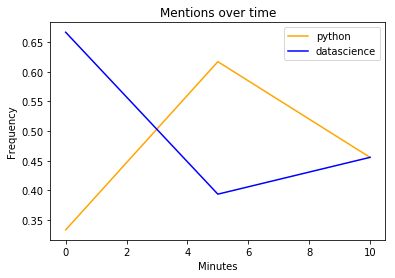

In [101]:
import matplotlib.pyplot as plt

# Average of python column by minutes
mean_python = tweets10_df['python'].resample('5T').mean()

# Average of datascience column by minutes
mean_datascience = tweets10_df['datascience'].resample('5T').mean()

# Plot mean python by day(orange)/mean datascience by day(blue)
plt.plot(mean_python.index.minute, mean_python, color = 'orange')
plt.plot(mean_datascience.index.minute, mean_datascience, color = 'blue')

# Add labels and show
plt.xlabel('Minutes'); plt.ylabel('Frequency')
plt.title('Mentions over time')
plt.legend(('python', 'datascience'))
plt.show()

### Sentiment Analysis

We can assess positivity and negativity of text using _Sentiment Analysis_. This would be particularly useful to analyse reactions to an event, a person, or a policy. We'll use `VADER`.

In [164]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# nltk.download()

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = tweets10_df['text'].apply(sid.polarity_scores)

In [131]:
print(type(sentiment_scores))
sentiment_scores.head()

<class 'pandas.core.series.Series'>


created_at
2019-06-12 13:04:47+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2019-06-12 13:04:49+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2019-06-12 13:04:58+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2019-06-12 13:05:01+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2019-06-12 13:05:01+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, dtype: object

In [171]:
import numpy as np
tweets10_df['sentiment'] = np.array([x['compound'] for x in sentiment_scores])

In [159]:
tweets10_df.head()

,contributors,coordinates,display_text_range,entities,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name,python,datascience
created_at,,,,,,,,,,,,,,,,,,,,,
2019-06-12 13:04:47+00:00,None,None,"[0, 140]","{'hashtags': [{'text': 'AI', 'indices': [111, ...",NaN,{'full_text': 'Entry-level Medical Writer - Ke...,Entry-level Medical Writer - Kelly Services ( ...,0,False,low,...,NaN,NaN,"<a href=""http://www.waseemly.com"" rel=""nofollo...",Entry-level Medical Writer - Kelly Services ( ...,1560344687012,True,"{'id': 926222961190764546, 'id_str': '92622296...",workwithai,False,True
2019-06-12 13:04:49+00:00,None,None,"[0, 140]","{'hashtags': [{'text': 'AI', 'indices': [19, 2...",NaN,{'full_text': 'Unleash your inner #AI with ass...,Unleash your inner #AI with assisted modeling ...,0,False,low,...,NaN,NaN,"<a href=""https://www.spredfast.com"" rel=""nofol...",Unleash your inner #AI with assisted modeling ...,1560344689509,True,"{'id': 16528607, 'id_str': '16528607', 'name':...",alteryx,False,True
2019-06-12 13:04:58+00:00,None,None,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,NaN,0,False,low,...,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",最近職場で慣れていないpythonにずっと向かい合っている気がする…,1560344698070,False,"{'id': 477707264, 'id_str': '477707264', 'name...",NULLspeed_hp,True,False
2019-06-12 13:05:01+00:00,None,None,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,NaN,0,False,low,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",pythonの三項演算子好きじゃない。,1560344701071,False,"{'id': 1023929060768927745, 'id_str': '1023929...",mito2357,True,False
2019-06-12 13:05:01+00:00,None,None,NaN,"{'hashtags': [{'text': 'job', 'indices': [98, ...",NaN,NaN,NaN,0,False,low,...,NaN,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",😆 BOOM! 😆 Could you be @Citymapper's Backend e...,1560344701281,False,"{'id': 1258138550, 'id_str': '1258138550', 'na...",unicornhuntio,True,False


In [173]:
# Print out the text of a positive tweet
print(tweets10_df[tweets10_df.sentiment > 0.5]['text'].values[0])

# Print out the text of a negative tweet
print(tweets10_df[tweets10_df.sentiment < -0.5]['text'].values[0])

# Generate average sentiment scores for #python
sentiment_py = tweets10_df.sentiment[check_keywords('python', tweets10_df)].resample('1T').mean()

# Generate average sentiment scores for #rstats
sentiment_ds = tweets10_df.sentiment[check_keywords('datascience', tweets10_df)].resample('1T').mean()

The latest Excel Daily News! https://t.co/VLFQaTWECr Thanks to @NewLogic_0 @ExcelDemy @cdxtech #excel #python
@aversifollo Esta fantasía se podría hacer con python? No no?


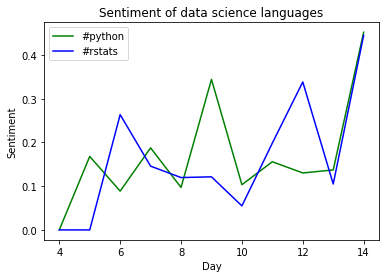

In [177]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot average #python sentiment per day
plt.plot(sentiment_py.index.minute, sentiment_py, color = 'green')

# Plot average #rstats sentiment per day
plt.plot(sentiment_ds.index.minute, sentiment_ds, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of data science languages')
plt.legend(('#python', '#rstats'))
plt.show()